In [4]:
%matplotlib inline

import cv2
import numpy as np
from matplotlib import pyplot as plt

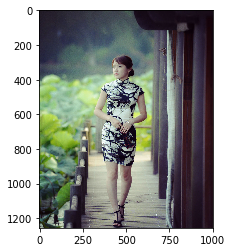

In [7]:
#  opencv 的接口使用BGR模式，而 matplotlib.pyplot 接口使用的是RGB模式
img = cv2.imread("img1.jpg", 1)
# cv2.imshow("src", img)
b, g, r = cv2.split(img)
srcImage_new = cv2.merge([r, g, b])
plt.imshow(srcImage_new)
# plt.show()




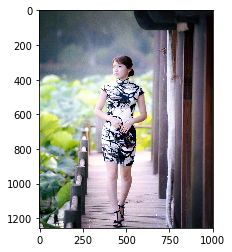

In [8]:
# 彩色图像均衡化,需要分解通道 对每一个通道均衡化
(b, g, r) = cv2.split(img)
bH = cv2.equalizeHist(b)
gH = cv2.equalizeHist(g)
rH = cv2.equalizeHist(r)
# 合并每一个通道
result = cv2.merge((rH, gH, bH))
# cv2.imshow("dst", result)

plt.imshow(result)
# plt.show()


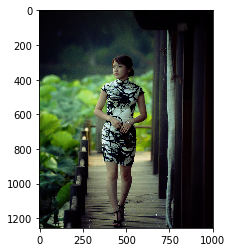

In [9]:
# Gamma图像增强
def adjust_gamma(src,gamma=2.0):
    scale = float(np.iinfo(src.dtype).max - np.iinfo(src.dtype).min)
    dst = ((src.astype(np.float32) / scale) ** gamma) * scale
    dst = np.clip(dst,0,255).astype(np.uint8)
    return dst
g_result = adjust_gamma(srcImage_new)
plt.imshow(g_result)

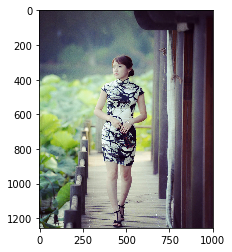

In [10]:
def log_enhance(src):
   
    scale = float(np.iinfo(src.dtype).max - np.iinfo(src.dtype).min)
    dst = np.log2(src.astype(np.float32) / scale + 1) * scale
    dst = np.clip(dst,0,255).astype(np.uint8)
    return dst
l_result = log_enhance(srcImage_new)
plt.imshow(l_result)